In [99]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8,6)

import seaborn as sns
sns.set_context('notebook')

In [100]:
%run AH_DATABASE.ipynb
db = DB('earthfury-alliance', timerange=30)


Usage: 
  db = DB(server)          --> initializes database
  db.get_df(item)          --> returns dataframe, prices divided by 100 so copper in decimal 
  db.get_name(item)        --> returns name of item  
  db.get_last_record(item) --> returns most recent record
  db.plot(item, y)         --> plots column over time



In [101]:
item = 2840
df = db.get_df(item)
df['hour'] = df['scannedAt'].dt.hour

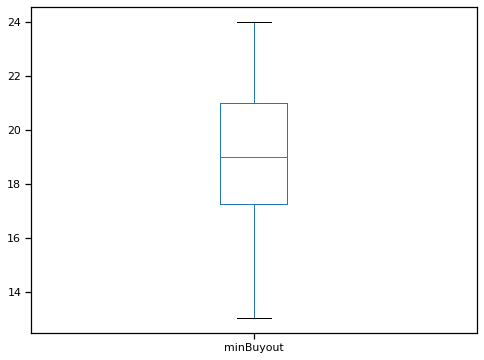

In [102]:
# records per day
df.groupby(by=df['scannedAt'].dt.date)['minBuyout'].count().plot(kind='box')

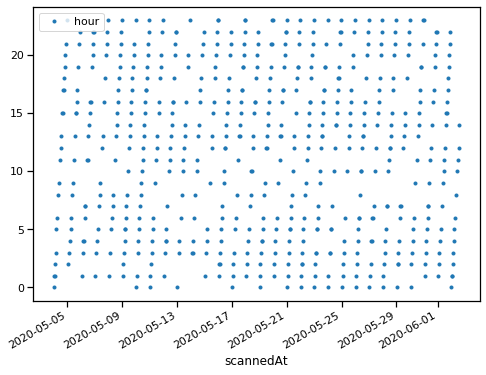

In [103]:
df.plot(x='scannedAt', y='hour', style='.')

## Resample Hourly

In [104]:
# resample hourly check non-nan
dfr = df.resample('60min', on='scannedAt').mean()
dfr

,marketValue,minBuyout,quantity,minBuyoutPctile,hour
scannedAt,,,,,
2020-05-04 00:00:00+00:00,3.490,2.790,579.0,0.323478,0.0
2020-05-04 01:00:00+00:00,3.835,0.195,414.0,0.002609,1.0
2020-05-04 02:00:00+00:00,2.070,1.950,650.0,0.080000,2.0
2020-05-04 03:00:00+00:00,3.870,2.450,458.0,0.217391,3.0
2020-05-04 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-02 10:00:00+00:00,4.990,4.710,1858.0,0.811304,10.0
2020-06-02 11:00:00+00:00,4.930,4.000,1833.0,0.686087,11.0
2020-06-02 12:00:00+00:00,4.950,4.000,1763.0,0.686087,12.0


In [91]:
def check_nan(df):
    isna = dfr['minBuyout'].isna().sum()
    pctna = round(isna/dfr["minBuyout"].count(),2)
    print(f'{isna} nan values {pctna}%')
    
check_nan(dfr)

196 nan values 0.38%


In [ ]:
### R

In [92]:
dfr = df.resample('60min', on='scannedAt').mean().ffill().reset_index()
dfr['hour'] = dfr['scannedAt'].dt.hour
check_nan(dfr)

0 nan values 0.0%


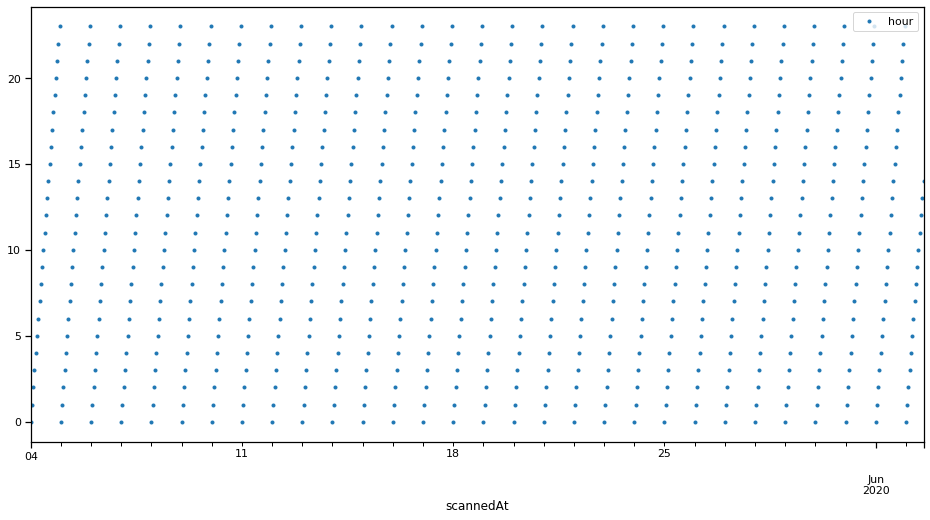

In [93]:
dfr.plot(x='scannedAt', y='hour', style='.')